In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv('../data/final_df.csv')

In [4]:
X = df.drop('target', axis=1)
y = df['target']

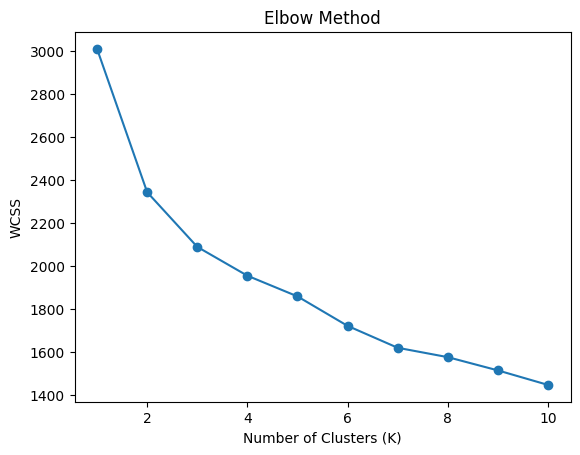

In [5]:
wcss = []
k = 1
for k in range(1,11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

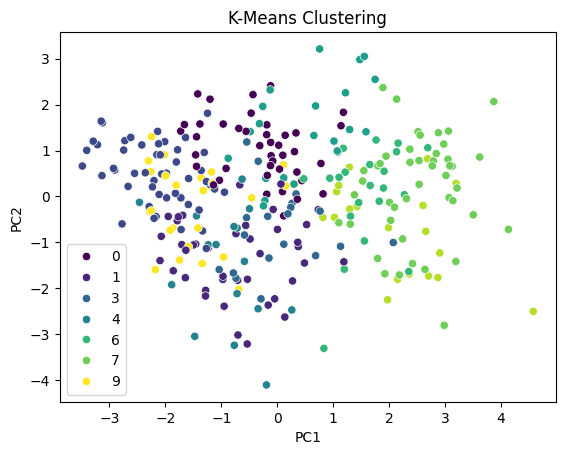

In [6]:
model = KMeans(n_clusters=3)
model.fit(X, y)

y_kmeans = k_means.fit_predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y_kmeans, palette="viridis")
plt.title("K-Means Clustering")
plt.show()



In [8]:
ari_kmeans = adjusted_rand_score(y, y_kmeans)
print(f"K-Means ARI Score: {ari_kmeans:.3f}")


K-Means ARI Score: 0.109


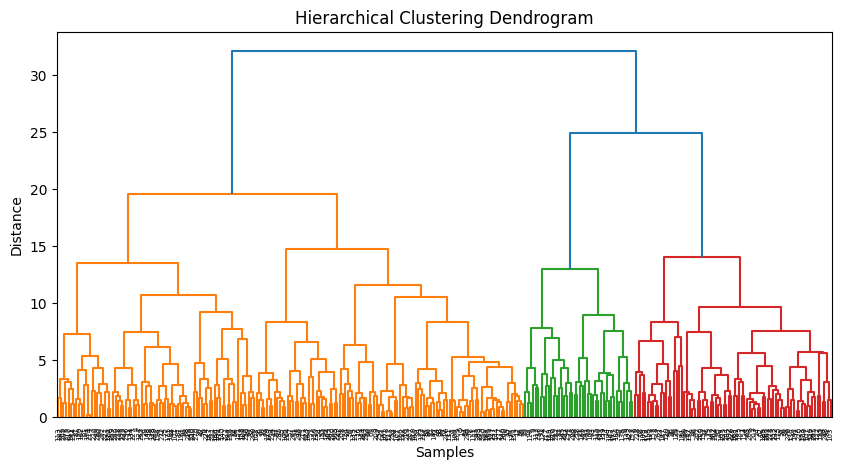

In [ ]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

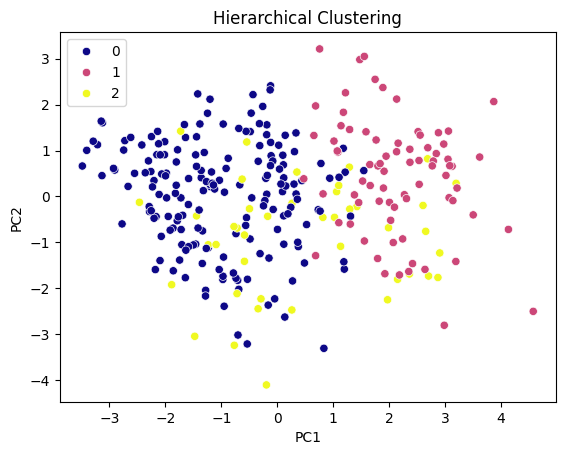

In [12]:
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hier = hier.fit_predict(X)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y_hier, palette="plasma")
plt.title("Hierarchical Clustering")
plt.show()


In [15]:
ari_hier = adjusted_rand_score(y, y_hier)
print(f"Hierarchical ARI Score: {ari_hier:.3f}")

Hierarchical ARI Score: 0.203


In [16]:
print("Confusion Matrix (K-Means):")
print(confusion_matrix(y, y_kmeans))

print("Confusion Matrix (Hierarchical):")
print(confusion_matrix(y, y_hier))


Confusion Matrix (K-Means):
[[17 33 44 11 15 11  3  2  1 23]
 [24  7  5  8  1 10 19 43 18  2]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
Confusion Matrix (Hierarchical):
[[128   9  23]
 [ 51  67  19]
 [  0   0   0]]
